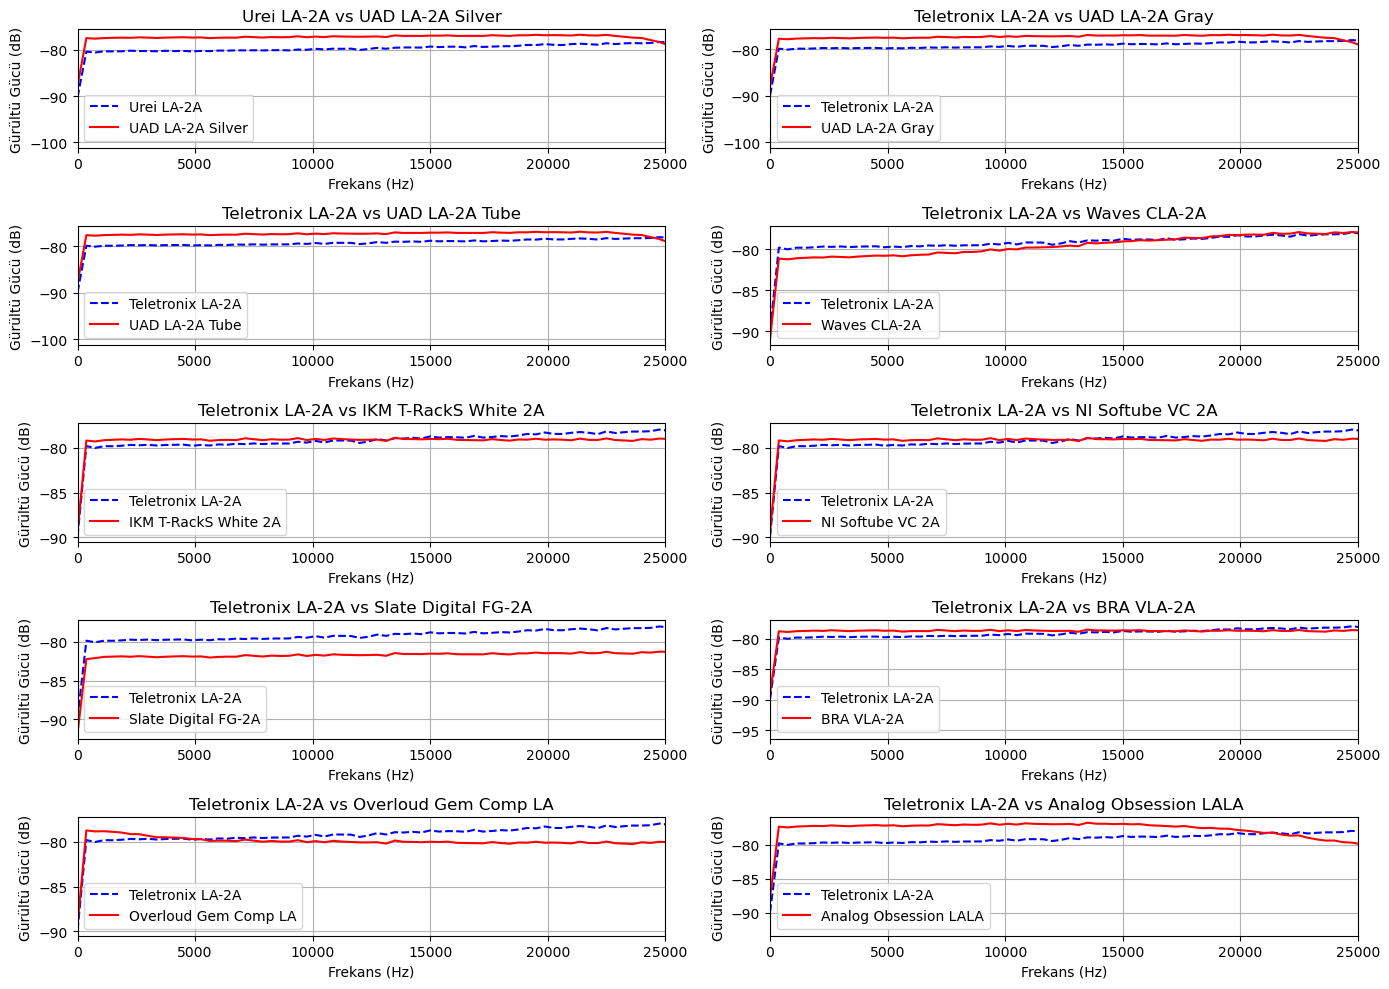

<Figure size 640x480 with 0 Axes>

In [4]:
# Ses sinyallerinin frekans bazlı gürültü profillerini karşılaştırmak için hazırlanmıştır.
# Y ekseni, her bir frekanstaki ortalama gürültü gücünü (power) ifade eder.
# Bu değerler logaritmik ölçekte dB (desibel) cinsinden gösterilir.

# White noise, tüm frekanslara eşit enerji dağıttığından frekansa duyarlı işleme özellikleri analiz etmek için ideal bir sinyaldir.
# LA-2A'nın kompresör etkisinin her frekans bandında nasıl çalıştığını incelemek için uygundur.

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/processed/teletronix_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/urei_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_gray_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_silver_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_tube_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/waves_cla-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ikm_white-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ni_softube_vc-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ss_fg-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/bra_vla-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/overloud_gem-comp-la_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ao_lala_white_noise.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Gürültü profili karşılaştırma fonksiyonu
def plot_noise_profiles(reference_signals, reference_labels, comparison_signals, comparison_labels, sr):
    """
    Referans ses sinyali ile diğer ses dosyalarının gürültü profillerini iki sütunlu bir düzende karşılaştırır.
    """
    epsilon = 1e-10  # Sıfır bölünme hatasını önlemek için küçük bir değer

    n_comparisons = len(comparison_signals)
    n_cols = 2
    n_rows = (n_comparisons + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 2))
    axes = axes.flatten()

    for i, (ref_signal, ref_label, comp_signal, comp_label) in enumerate(zip(reference_signals, reference_labels, comparison_signals, comparison_labels)):
        # Referans spektrumu hesapla
        freqs_ref, _, Sxx_ref = signal.spectrogram(ref_signal, sr)
        ref_power = np.mean(10 * np.log10(Sxx_ref + epsilon), axis=1)

        # Karşılaştırma spektrumu hesapla
        freqs, _, Sxx = signal.spectrogram(comp_signal, sr)
        comp_power = np.mean(10 * np.log10(Sxx + epsilon), axis=1)

        ax = axes[i]
        ax.plot(freqs_ref, ref_power, label=ref_label, linestyle="--", color="blue")
        ax.plot(freqs, comp_power, label=comp_label, color="red")
        ax.set_title(f"{ref_label} vs {comp_label}")
        ax.set_xlabel("Frekans (Hz)")
        ax.set_ylabel("Gürültü Gücü (dB)")
        ax.set_xlim(0, 25000)
        ax.legend()
        ax.grid()

    # Kullanılmayan eksenleri kaldır
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Ses dosyalarını yükleme
audio_signals = [librosa.load(file, sr=None) for file in audio_files]
signals, sample_rates = zip(*audio_signals)

# **Karşılaştırmalar:**
reference_signals = [
    signals[1],  # Urei LA-2A
    *([signals[0]] * 9),  # Teletronix LA-2A
]
reference_labels = [
    "Urei LA-2A",
    *([audio_labels[0]] * 9),
]
comparison_signals = [
    signals[3],  # UAD LA-2A Silver
    *[signals[i] for i in range(len(audio_files)) if i not in {0, 1, 3}],  # Teletronix comparisons
]
comparison_labels = [
    "UAD LA-2A Silver",
    *[audio_labels[i] for i in range(len(audio_files)) if i not in {0, 1, 3}],
]

# Gürültü profillerini çiz
plot_noise_profiles(reference_signals, reference_labels, comparison_signals, comparison_labels, sr=sample_rates[0])

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 'rect' değerini biraz aşağı alarak sıkışmayı engelledik
plt.show()
